In [1]:
pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv(r"D:\Data Mining\Data sets for lab report\Heart Attack\heart_attack_risk_dataset.csv")

In [4]:
data.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

In [5]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      49926 non-null  float64
 1   Gender                   50000 non-null  object 
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  object 
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  int64  
 10  Heart_Rate               50000 non-null  int64  
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  object 
 13  Chest_Pain_Type          50000 non-null  object 
 14  Thalassemia           

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69.0,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32.0,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89.0,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78.0,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38.0,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate


In [6]:
data.isna().sum()

Age                        74
Gender                      0
Smoking                     0
Alcohol_Consumption         0
Physical_Activity_Level     0
BMI                         0
Diabetes                    0
Hypertension                0
Cholesterol_Level           0
Resting_BP                  0
Heart_Rate                  0
Family_History              0
Stress_Level                0
Chest_Pain_Type             0
Thalassemia                 0
Fasting_Blood_Sugar         0
ECG_Results                 0
Exercise_Induced_Angina     0
Max_Heart_Rate_Achieved     0
Heart_Attack_Risk           0
dtype: int64

### Filling the null values

In [8]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [9]:
data.isna().sum()

Age                        0
Gender                     0
Smoking                    0
Alcohol_Consumption        0
Physical_Activity_Level    0
BMI                        0
Diabetes                   0
Hypertension               0
Cholesterol_Level          0
Resting_BP                 0
Heart_Rate                 0
Family_History             0
Stress_Level               0
Chest_Pain_Type            0
Thalassemia                0
Fasting_Blood_Sugar        0
ECG_Results                0
Exercise_Induced_Angina    0
Max_Heart_Rate_Achieved    0
Heart_Attack_Risk          0
dtype: int64

### Checking for duplicated values

In [11]:
data.duplicated().sum()

0

### Data Visualization

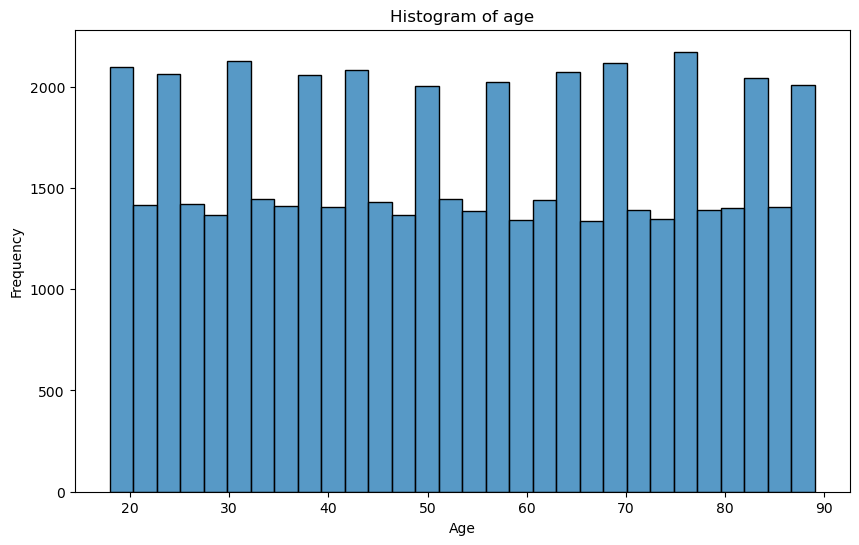

In [13]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30)
plt.title('Histogram of age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

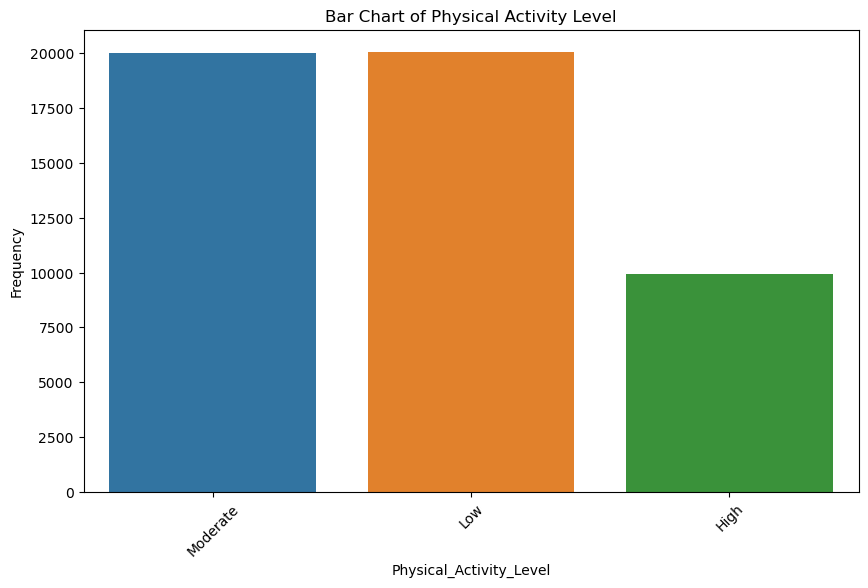

In [14]:
# Bar plot for 
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Physical_Activity_Level'])
plt.title('Bar Chart of Physical Activity Level')
plt.xlabel('Physical_Activity_Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

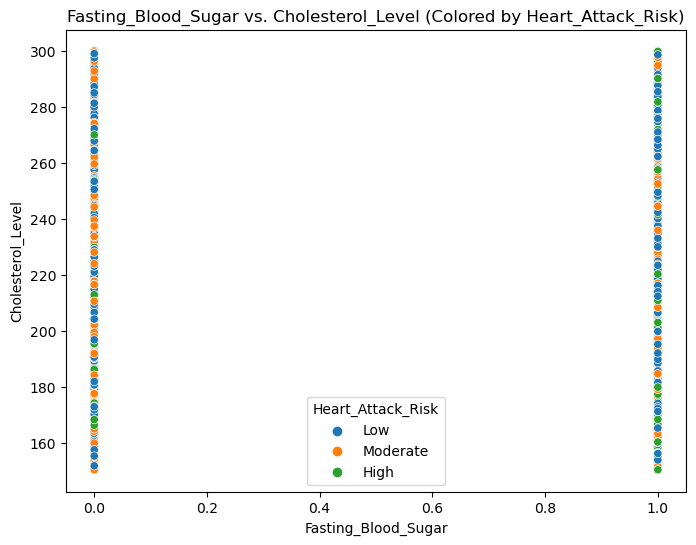

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fasting_Blood_Sugar', y='Cholesterol_Level', data=data, hue='Heart_Attack_Risk')
plt.title('Fasting_Blood_Sugar vs. Cholesterol_Level (Colored by Heart_Attack_Risk)')
plt.xlabel('Fasting_Blood_Sugar')
plt.ylabel('Cholesterol_Level')
plt.show()

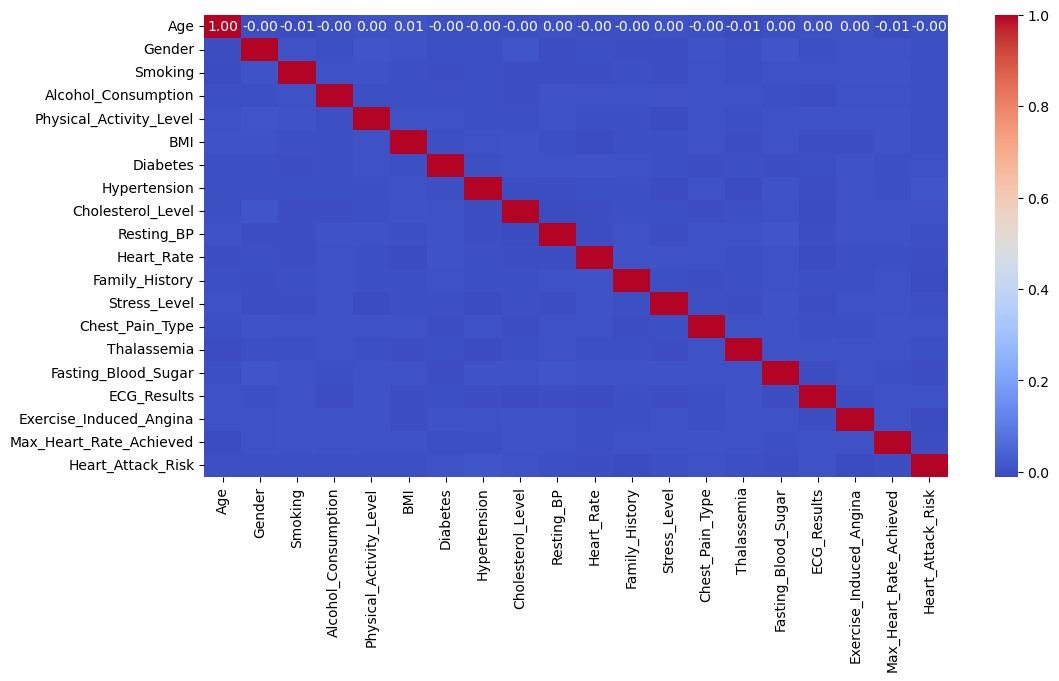

In [125]:
# Check correlation
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [16]:
data

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69.0,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32.0,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89.0,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78.0,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38.0,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21.0,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35.0,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46.0,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56.0,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate


In [17]:
# Clean column names by stripping spaces
data.columns = data.columns.str.strip()

In [18]:
dtype = {
    'Age': 'int64',
'BMI': 'int64',
'Cholesterol_Level':'int64',
'Resting_BP':'int64',
'Heart_Rate':'int64',
'Stress_Level':'category',
'Fasting_Blood_Sugar':'int64',
'Max_Heart_Rate_Achieved':'int64',
'Gender':'category',
'Smoking':'category',
'Alcohol_Consumption':'category',
'Physical_Activity_Level':'category',
'Diabetes':'category',
'Hypertension':'category',
'Family_History':'category',
'Chest_Pain_Type':'category',
'Thalassemia':'category',
'ECG_Results':'category',
'Exercise_Induced_Angina':'category',
'Heart_Attack_Risk':'category'
}

In [19]:
d = data.copy()

In [20]:
d

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69.0,Female,1,0,Moderate,34.61,1,0,152.1,171,85,0,Moderate,Non-anginal,Reversible defect,0,Normal,0,114,Low
1,32.0,Male,0,0,Moderate,22.75,0,0,166.8,126,103,0,Low,Asymptomatic,Normal,0,ST-T abnormality,0,173,Moderate
2,89.0,Male,0,1,Moderate,35.32,0,0,272.3,123,127,0,Low,Typical,Reversible defect,0,ST-T abnormality,0,109,Low
3,78.0,Male,0,1,Moderate,18.23,1,0,237.7,144,125,0,Low,Typical,Fixed defect,1,Left Ventricular Hypertrophy,0,129,Low
4,38.0,Female,1,0,Moderate,19.82,0,0,207.7,123,107,0,High,Asymptomatic,Reversible defect,0,ST-T abnormality,0,124,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21.0,Male,0,0,Low,39.93,0,0,269.9,171,113,0,High,Typical,Reversible defect,0,ST-T abnormality,0,122,High
49996,35.0,Female,0,0,Low,18.10,0,0,235.8,146,71,0,Moderate,Non-anginal,Fixed defect,1,ST-T abnormality,0,121,Moderate
49997,46.0,Male,0,1,High,21.42,0,0,172.8,146,85,1,Low,Typical,Fixed defect,0,Left Ventricular Hypertrophy,0,125,Low
49998,56.0,Male,0,1,Low,29.93,0,0,244.1,151,110,0,Low,Asymptomatic,Reversible defect,0,Normal,0,149,Moderate


In [21]:
d = d.astype(dtype)

In [22]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      50000 non-null  int64   
 1   Gender                   50000 non-null  category
 2   Smoking                  50000 non-null  category
 3   Alcohol_Consumption      50000 non-null  category
 4   Physical_Activity_Level  50000 non-null  category
 5   BMI                      50000 non-null  int64   
 6   Diabetes                 50000 non-null  category
 7   Hypertension             50000 non-null  category
 8   Cholesterol_Level        50000 non-null  int64   
 9   Resting_BP               50000 non-null  int64   
 10  Heart_Rate               50000 non-null  int64   
 11  Family_History           50000 non-null  category
 12  Stress_Level             50000 non-null  category
 13  Chest_Pain_Type          50000 non-null  category
 14  Thalas

### Analyzing categorical columns

In [24]:
categorical_cols = d.describe(include='category').columns
categorical_cols

Index(['Gender', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity_Level',
       'Diabetes', 'Hypertension', 'Family_History', 'Stress_Level',
       'Chest_Pain_Type', 'Thalassemia', 'ECG_Results',
       'Exercise_Induced_Angina', 'Heart_Attack_Risk'],
      dtype='object')

In [25]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
for column in d.select_dtypes(include=['category']).columns:
    d[column] = label_encoder.fit_transform(d[column])

In [26]:
d

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,69,0,1,0,2,34,1,0,152,171,85,0,2,2,2,0,1,0,114,1
1,32,1,0,0,2,22,0,0,166,126,103,0,1,0,1,0,2,0,173,2
2,89,1,0,1,2,35,0,0,272,123,127,0,1,3,2,0,2,0,109,1
3,78,1,0,1,2,18,1,0,237,144,125,0,1,3,0,1,0,0,129,1
4,38,0,1,0,2,19,0,0,207,123,107,0,0,0,2,0,2,0,124,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,21,1,0,0,1,39,0,0,269,171,113,0,0,3,2,0,2,0,122,0
49996,35,0,0,0,1,18,0,0,235,146,71,0,2,2,0,1,2,0,121,2
49997,46,1,0,1,0,21,0,0,172,146,85,1,1,3,0,0,0,0,125,1
49998,56,1,0,1,1,29,0,0,244,151,110,0,1,0,2,0,1,0,149,2


### Data Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to normalize
numerical_columns = [
    'Age', 'BMI', 'Cholesterol_Level', 'Resting_BP', 
    'Heart_Rate', 'Fasting_Blood_Sugar', 
    'Max_Heart_Rate_Achieved'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the numerical columns
d[numerical_columns] = scaler.fit_transform(d[numerical_columns])

In [29]:
d.describe()

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.498497,0.498280,0.298420,0.401980,1.20098,0.480969,0.198840,0.29738,0.497261,0.499260,0.500442,0.30034,1.301400,1.508320,1.003180,0.149360,1.001460,0.201640,0.498034,1.096640
std,0.292771,0.500002,0.457569,0.490303,0.74726,0.288829,0.399131,0.45711,0.288761,0.291101,0.292567,0.45841,0.778852,1.118461,0.814901,0.356447,0.814881,0.401229,0.291148,0.700136
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.239437,0.000000,0.000000,0.000000,1.00000,0.240000,0.000000,0.00000,0.246667,0.247191,0.246377,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.242424,1.000000
50%,0.492958,0.000000,0.000000,0.000000,1.00000,0.480000,0.000000,0.00000,0.500000,0.494382,0.492754,0.00000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.494949,1.000000
75%,0.746479,1.000000,1.000000,1.000000,2.00000,0.720000,0.000000,1.00000,0.746667,0.752809,0.753623,1.00000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.747475,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000


In [30]:
d.columns

Index(['Age', 'Gender', 'Smoking', 'Alcohol_Consumption',
       'Physical_Activity_Level', 'BMI', 'Diabetes', 'Hypertension',
       'Cholesterol_Level', 'Resting_BP', 'Heart_Rate', 'Family_History',
       'Stress_Level', 'Chest_Pain_Type', 'Thalassemia', 'Fasting_Blood_Sugar',
       'ECG_Results', 'Exercise_Induced_Angina', 'Max_Heart_Rate_Achieved',
       'Heart_Attack_Risk'],
      dtype='object')

### Performing KNN

In [32]:
d['Heart_Attack_Risk'].value_counts()

Heart_Attack_Risk
1    25024
2    14904
0    10072
Name: count, dtype: int64

In [33]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      50000 non-null  float64
 1   Gender                   50000 non-null  int32  
 2   Smoking                  50000 non-null  int64  
 3   Alcohol_Consumption      50000 non-null  int64  
 4   Physical_Activity_Level  50000 non-null  int32  
 5   BMI                      50000 non-null  float64
 6   Diabetes                 50000 non-null  int64  
 7   Hypertension             50000 non-null  int64  
 8   Cholesterol_Level        50000 non-null  float64
 9   Resting_BP               50000 non-null  float64
 10  Heart_Rate               50000 non-null  float64
 11  Family_History           50000 non-null  int64  
 12  Stress_Level             50000 non-null  int32  
 13  Chest_Pain_Type          50000 non-null  int32  
 14  Thalassemia           

In [34]:
d.select_dtypes(include = ['category']).columns

Index([], dtype='object')

In [41]:
d

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,0.718310,0,1,0,2,0.76,1,0,0.013333,0.910112,0.362319,0,2,2,2,0.0,1,0,0.141414,1
1,0.197183,1,0,0,2,0.28,0,0,0.106667,0.404494,0.623188,0,1,0,1,0.0,2,0,0.737374,2
2,1.000000,1,0,1,2,0.80,0,0,0.813333,0.370787,0.971014,0,1,3,2,0.0,2,0,0.090909,1
3,0.845070,1,0,1,2,0.12,1,0,0.580000,0.606742,0.942029,0,1,3,0,1.0,0,0,0.292929,1
4,0.281690,0,1,0,2,0.16,0,0,0.380000,0.370787,0.681159,0,0,0,2,0.0,2,0,0.242424,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.042254,1,0,0,1,0.96,0,0,0.793333,0.910112,0.768116,0,0,3,2,0.0,2,0,0.222222,0
49996,0.239437,0,0,0,1,0.12,0,0,0.566667,0.629213,0.159420,0,2,2,0,1.0,2,0,0.212121,2
49997,0.394366,1,0,1,0,0.24,0,0,0.146667,0.629213,0.362319,1,1,3,0,0.0,0,0,0.252525,1
49998,0.535211,1,0,1,1,0.56,0,0,0.626667,0.685393,0.724638,0,1,0,2,0.0,1,0,0.494949,2


In [35]:
# # Encode categorical variables
# for col in df.select_dtypes(include=['object']).columns:
#     # df[col] = LabelEncoder().fit_transform(df[col])
#     print(df[col])

In [36]:
# Encode categorical variables
for col in data.select_dtypes(include=['object']).columns:
    data[col] = LabelEncoder().fit_transform(data[col])

In [43]:
d_resampled = d.copy()
d_resampled

,Age,Gender,Smoking,Alcohol_Consumption,Physical_Activity_Level,BMI,Diabetes,Hypertension,Cholesterol_Level,Resting_BP,Heart_Rate,Family_History,Stress_Level,Chest_Pain_Type,Thalassemia,Fasting_Blood_Sugar,ECG_Results,Exercise_Induced_Angina,Max_Heart_Rate_Achieved,Heart_Attack_Risk
0,0.718310,0,1,0,2,0.76,1,0,0.013333,0.910112,0.362319,0,2,2,2,0.0,1,0,0.141414,1
1,0.197183,1,0,0,2,0.28,0,0,0.106667,0.404494,0.623188,0,1,0,1,0.0,2,0,0.737374,2
2,1.000000,1,0,1,2,0.80,0,0,0.813333,0.370787,0.971014,0,1,3,2,0.0,2,0,0.090909,1
3,0.845070,1,0,1,2,0.12,1,0,0.580000,0.606742,0.942029,0,1,3,0,1.0,0,0,0.292929,1
4,0.281690,0,1,0,2,0.16,0,0,0.380000,0.370787,0.681159,0,0,0,2,0.0,2,0,0.242424,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.042254,1,0,0,1,0.96,0,0,0.793333,0.910112,0.768116,0,0,3,2,0.0,2,0,0.222222,0
49996,0.239437,0,0,0,1,0.12,0,0,0.566667,0.629213,0.159420,0,2,2,0,1.0,2,0,0.212121,2
49997,0.394366,1,0,1,0,0.24,0,0,0.146667,0.629213,0.362319,1,1,3,0,0.0,0,0,0.252525,1
49998,0.535211,1,0,1,1,0.56,0,0,0.626667,0.685393,0.724638,0,1,0,2,0.0,1,0,0.494949,2


In [93]:
from sklearn.utils import resample

# Separate classes
class_0 = d_resampled[d_resampled['Heart_Attack_Risk'] == 0]
class_1 = d_resampled[d_resampled['Heart_Attack_Risk'] == 1]
class_2 = d_resampled[d_resampled['Heart_Attack_Risk'] == 2]

# Find the maximum class count
max_samples = max(len(class_0), len(class_1), len(class_2))

# Oversample minority classes
class_0_oversampled = resample(class_0, replace=True, n_samples=max_samples, random_state=42)
class_1_oversampled = resample(class_1, replace=True, n_samples=max_samples, random_state=42)
class_2_oversampled = resample(class_2, replace=True, n_samples=max_samples, random_state=42)

# Combine all balanced classes
balanced_data = pd.concat([class_0_oversampled, class_1_oversampled, class_2_oversampled])

# Shuffle dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Define Features and Target
X = balanced_data.drop(columns=['Heart_Attack_Risk'])
y = balanced_data['Heart_Attack_Risk']
print(balanced_data['Heart_Attack_Risk'].value_counts())

Heart_Attack_Risk
2    25024
1    25024
0    25024
Name: count, dtype: int64


In [91]:
# Verify the new distribution
print(d_resampled['Heart_Attack_Risk'].value_counts())

Heart_Attack_Risk
1    25024
2    14904
0    10072
Name: count, dtype: int64


In [111]:
from sklearn.model_selection import train_test_split

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Display the split datasets
print("Train set:",X_train.shape,y_train.shape)
print("\nTest set:",X_test.shape,y_test.shape)

Train set: (67564, 19) (67564,)

Test set: (7508, 19) (7508,)


In [143]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=1)  # Use 5 neighbors (you can tune this)

# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [145]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67564 entries, 51353 to 15795
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      67564 non-null  float64
 1   Gender                   67564 non-null  int32  
 2   Smoking                  67564 non-null  int64  
 3   Alcohol_Consumption      67564 non-null  int64  
 4   Physical_Activity_Level  67564 non-null  int32  
 5   BMI                      67564 non-null  float64
 6   Diabetes                 67564 non-null  int64  
 7   Hypertension             67564 non-null  int64  
 8   Cholesterol_Level        67564 non-null  float64
 9   Resting_BP               67564 non-null  float64
 10  Heart_Rate               67564 non-null  float64
 11  Family_History           67564 non-null  int64  
 12  Stress_Level             67564 non-null  int32  
 13  Chest_Pain_Type          67564 non-null  int32  
 14  Thalassemia            

In [147]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.88      2487
           1       0.85      0.76      0.81      2480
           2       0.84      0.85      0.84      2541

    accuracy                           0.85      7508
   macro avg       0.85      0.85      0.85      7508
weighted avg       0.85      0.85      0.85      7508

Confusion Matrix:
[[2302  106   79]
 [ 249 1896  335]
 [ 165  219 2157]]
